# **CS 1810 Homework 0**
---
To account for potential version issues, try the following in your terminal:

1. Create a new environment with `python3 -m venv venv`
2. Activate that environment with `source venv/bin/activate`
3. Make sure the interpreter in the top right corner of your VSCode (or whatever u use to run ur code is venv).
4. If you get a "install kernel" message, press it.
5. Run `pip install -r requirements.txt`
6. Run the remainder of this notebook.

Note that this is not necessary (especially for hw0) but can help prevent any issues due to package versions.

In [150]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn
import math

## 2.1 Plot $y = -3x^2 + 72x + 70$.

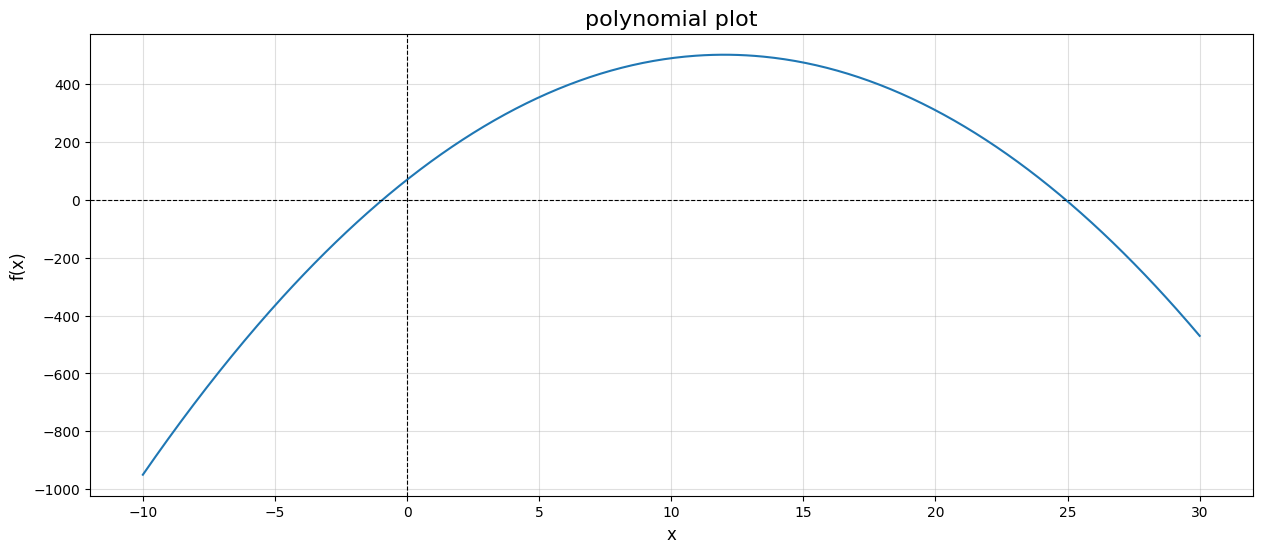

In [151]:
coefficients = [-3, 72, 70]
polynomial = np.poly1d(coefficients)
x = np.linspace(-10, 30, 500)
y = polynomial(x)

plt.figure(figsize=(15, 6))

plt.plot(x, y)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--') 
plt.axvline(0, color='black', linewidth=0.8, linestyle='--') 

plt.title("polynomial plot", fontsize=16)
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)

plt.grid(alpha=0.4)
plt.show()


## 2.3 Plot $f(x_1, x_2)$.

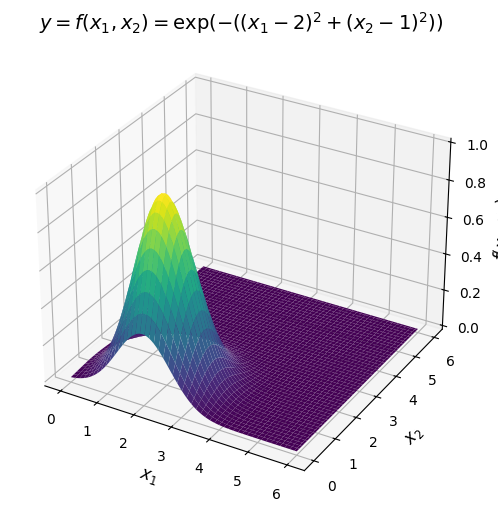

In [152]:
def f(x1, x2):
    return np.exp(-((x1 - 2)**2 + (x2 - 1)**2))

x1 = np.linspace(0, 6, 100)
x2 = np.linspace(0, 6, 100)
x1, x2 = np.meshgrid(x1, x2)

y = f(x1, x2)

fig = plt.figure()
fig.set_size_inches(15, 6)  # Ensures correct width
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x1, x2, y, cmap='viridis', edgecolor='none')

ax.set_title(r"$y = f(x_1, x_2) = \exp(-((x_1-2)^2 + (x_2-1)^2))$", fontsize=14)
ax.set_xlabel(r"$x_1$", fontsize=12)
ax.set_ylabel(r"$x_2$", fontsize=12)
ax.set_zlabel(r"$f(x_1, x_2)$", fontsize=12)

plt.show()


## 3.1(b) Draw from joint distribution of $(S, W)$ and generate bivariate histogram.

/var/folders/wm/v0b1ckpd1gs0l2147bbtn2sr0000gn/T/ipykernel_30149/176415107.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


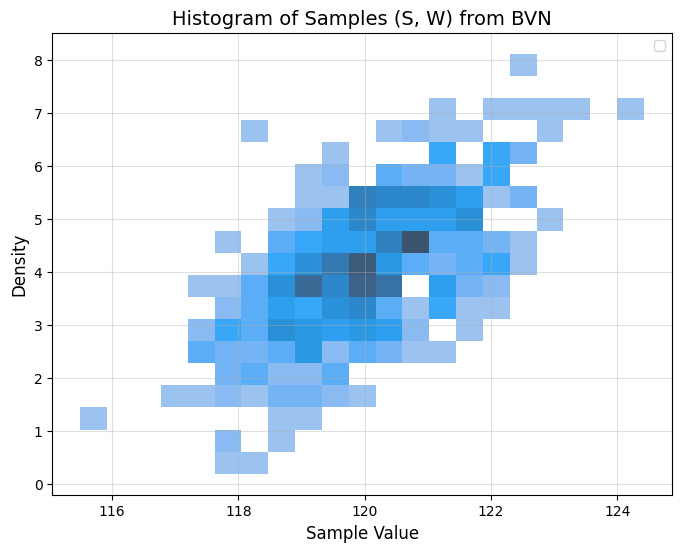

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn

mean = [120, 4] 
cov = [[1.5, 1], [1, 1.5]]  

samples = mvn(mean=mean, cov=cov).rvs(size=500)

S_samples = samples[:, 0] 
W_samples = samples[:, 1]

plt.figure(figsize=(8, 6))

sns.histplot(x=S_samples, y=W_samples)

plt.title("Histogram of Samples (S, W) from BVN", fontsize=14)
plt.xlabel("Sample Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(alpha=0.4)
plt.legend()
plt.show()

## 3.2 Plot the joint PDFs at $S=118$ and $S=122$, varying $W$.

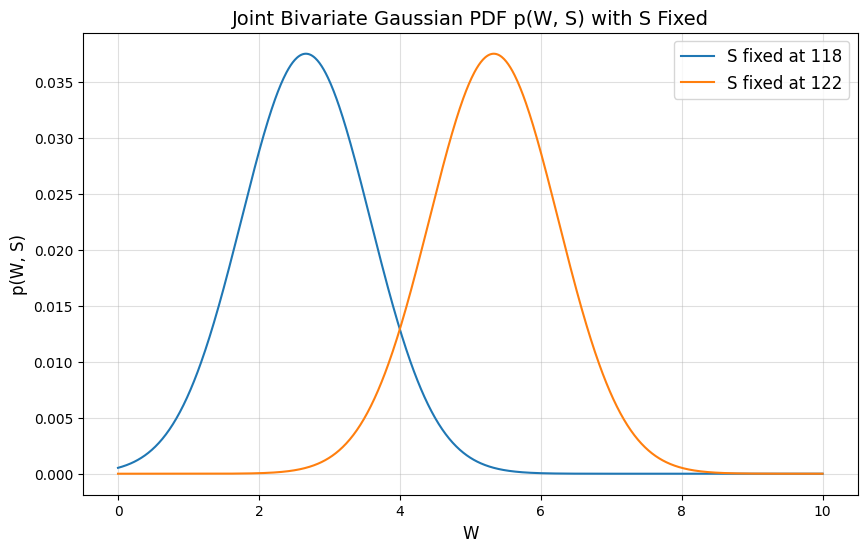

In [155]:
mean = [120, 4] 
cov = [[1.5, 1], [1, 1.5]] 

W = np.linspace(0, 10, 1001)
S_fixed_values = [118, 122]

plt.figure(figsize=(10, 6))

for S_fixed in S_fixed_values:
    pdf_values = [mvn(mean=mean, cov=cov).pdf([S_fixed, w]) for w in W]
    plt.plot(W, pdf_values, label=f"S fixed at {S_fixed}")

plt.title("Joint Bivariate Gaussian PDF p(W, S) with S Fixed", fontsize=14)
plt.xlabel("W", fontsize=12)
plt.ylabel("p(W, S)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.show()

## 3.5(a) Function to simulate draws from $T^{*}$.

In [156]:
def sample_Ti(mean, cov):
    S, W = mvn(mean=mean, cov=cov).rvs(size=1)
    epsilon = np.random.normal(0, math.sqrt(5), 1)[0]
    Ti = 60 + 0.6 * W + 0.2 * S + epsilon
    return Ti

def sample_N():
    Ph = np.random.poisson(3, 24)
    return sum(Ph)

def sample_Tstar(mean, cov):
    N = sample_N()
    Tis = [sample_Ti(mean, cov) for _ in range(N)]
    return sum(Tis)

## 3.5(b) Empirically estimate the mean and standard deviation of $T^{*}$ by generating $1000$ samples.

In [157]:
mean = [120, 4]
cov = [[1.5, 1], [1, 1.5]]

Tstar_samples = [sample_Tstar(mean, cov) for _ in range(1000)]

print("mean =", np.mean(Tstar_samples)) 
print("stdev =", np.std(Tstar_samples))

mean = 6230.519232753586
stdev = 738.8138275200109


# 4.1: Examining the Data

In [158]:
# Steve's solution
data = pd.read_csv("data/points.csv").values
x = data[0]
y = data[1]

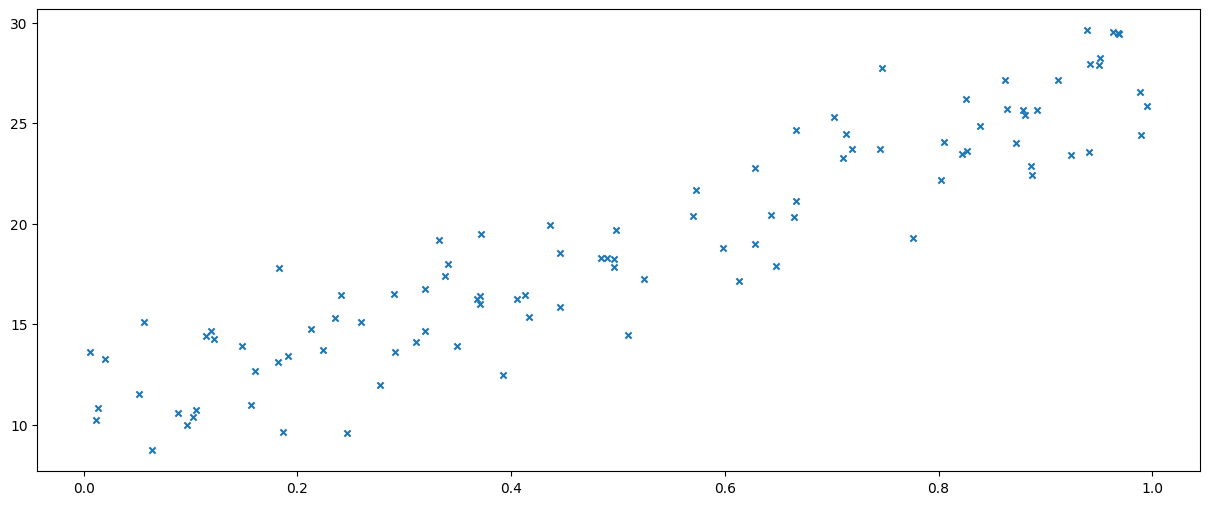

In [160]:
# fixed
data = pd.read_csv("data/points.csv")
x = data.x.values
y = data.y.values

plt.figure(figsize=(15,6))
plt.scatter(x, y, marker="x", s=20)
plt.show()

## 4.2: Adding the Intercept/Bias Term

In [161]:
# Steve's solution
intercept = np.ones(x.shape[0])
X = np.hstack([intercept, x]) # horizontally stack the ones and x coordinates next to each other

In [162]:
intercept = np.ones(x.shape[0])
X = np.column_stack([intercept, x])

print("y.shape =", y.shape)
print("X.shape =", X.shape)

y.shape = (100,)
X.shape = (100, 2)


## 4.4: Implementing the LinearRegression Class

In [163]:
# Steve's solution
class LinearRegression:
    def __init__(self):
        self.w = None

    def fit(self, X, y):
        """
        Fit linear model to the data, estimating weights w.
        """
        return (X.T * X)**-1 * X * y.T

    def predict(X):
        """
        Use fitted weights to predict target y given input features X.
        """
        return X @ w

In [164]:
# fixed
class LinearRegression:
    def __init__(self):
        self.w = None

    def fit(self, X, y):
        """
        Fit linear model to the data, estimating weights w.
        """
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y # fixed terms. also can't do **(-1). also store for use in predict
        return self.w

    def predict(self, X): # pass in self
        """
        Use fitted weights to predict target y given input features X.
        """
        return X @ self.w # corrected access

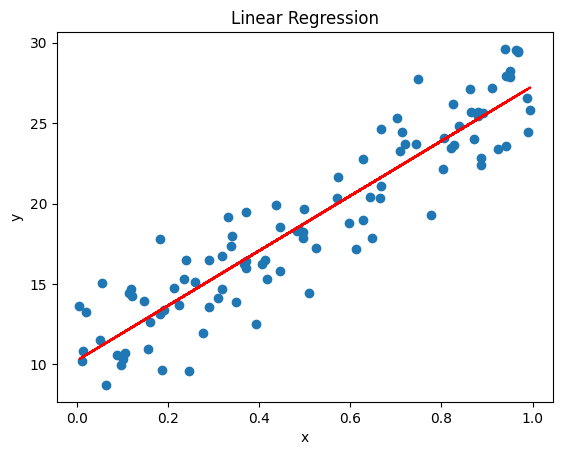

In [165]:
### DON'T MODIFY THIS CELL

# Fit the linear regression
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
# Plot the data and the regression line
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred, color='red')
plt.title("Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('img_output/hw0_p4_4.png')
plt.show()

## 4.5 MSE Computation

In [166]:
# Steve's solution
mse = 0
for i in range(len(y)):
    mse = mse + (y[i] - y_pred[i])**2
mse = mse / len(y)
print(mse)

4.439331220193985


In [167]:
# fixed
np.mean((y - y_pred) ** 2)

np.float64(4.439331220193984)